Vimos o **SVM** como um classificador poderoso. Agora é a vez de investigarmos melhor o **Random Forest**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Random Forest consiste em um modelo **Ensemble**. (hein?)

Antes de entendermos o que é um modelo **Ensemble**, vamos entender árvores de Decisão.

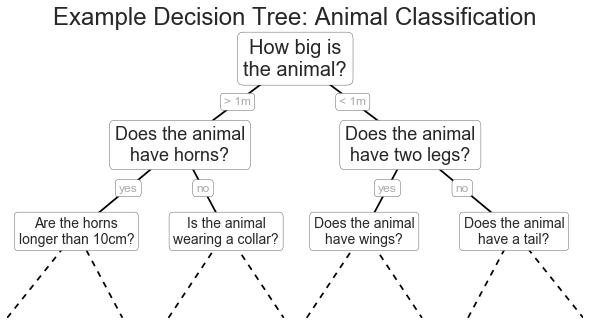

In [2]:
import fig_code
fig_code.plot_example_decision_tree()

### Vamos criar uma árvore?

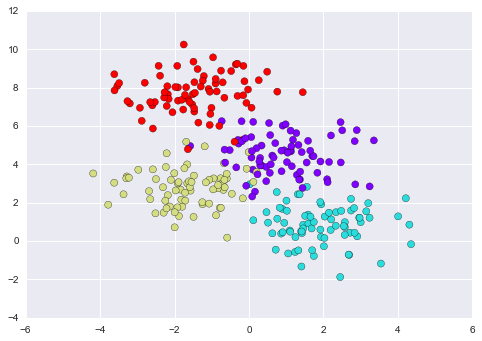

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [4]:
from fig_code import visualize_tree, plot_tree_interactive

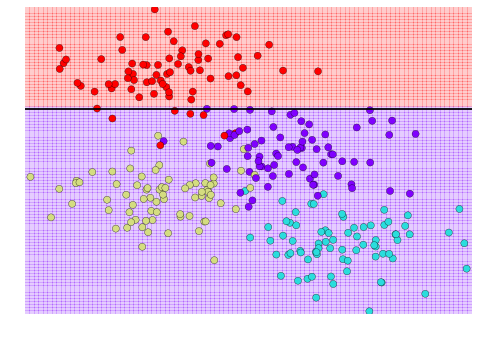

In [5]:
plot_tree_interactive(X, y)

#### Você enxerga algum problema com Árvores de Decisão?

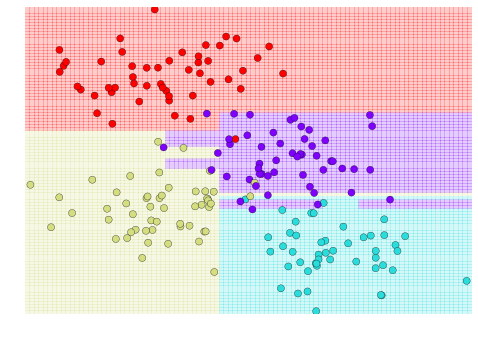

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)

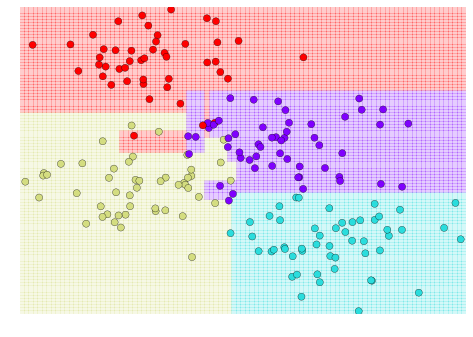

In [8]:
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

#### Ensembles: Random Forest

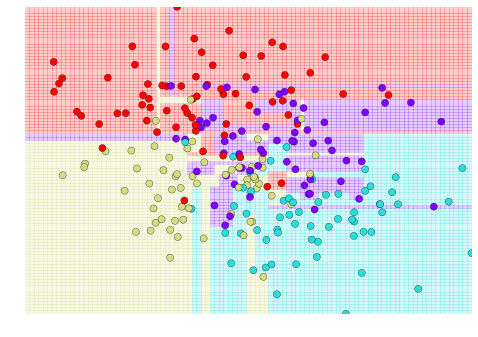

In [9]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

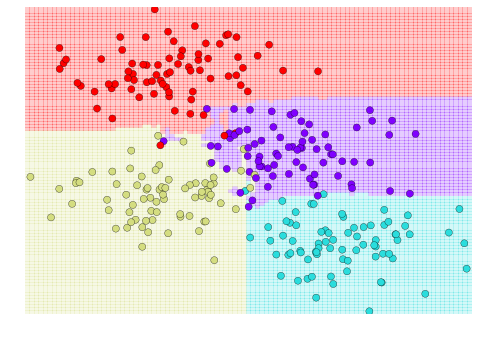

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

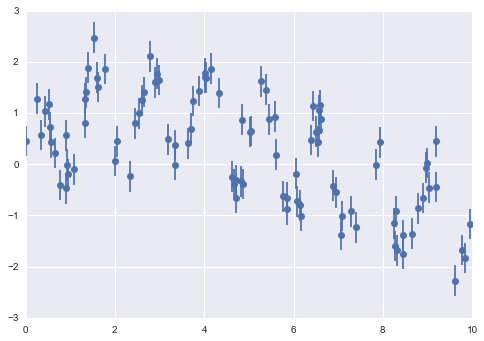

In [11]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

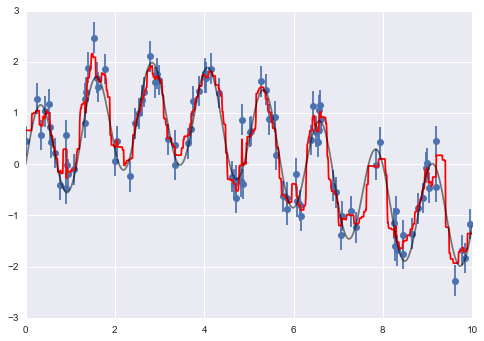

In [12]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

#### Random Forest para classificar Dígitos

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['DESCR', 'target_names', 'data', 'target', 'images'])

In [14]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


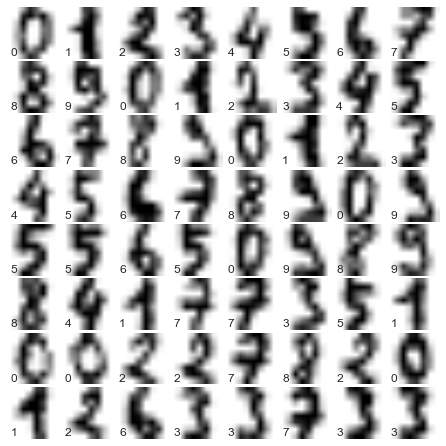

In [15]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [17]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [18]:
metrics.accuracy_score(ypred, ytest)

0.82444444444444442

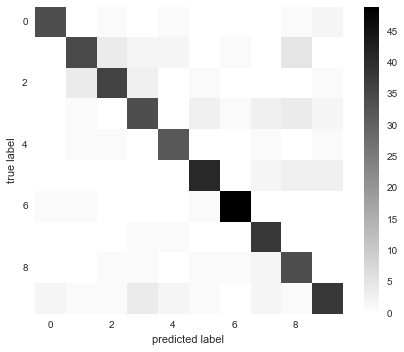

In [19]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

**Exercício**

* Repetir a tarefa de classificação com *sklearn.ensemble.RandomForestClassifier*.

> Como a alteração de alguns parâmetros afeta o resultado final? (max_depth, max_features, n_estimators)

* Experimente agora fazer a mesma classificação, mas utilizando *sklearn.svm.SVC*, ajustando os kernel, C e gamma.

> Qual dos classificadores contruímos tem melhor performance?

* Altere esses parâmetros e compare com o F1 score (sklearn.metrics.f1_score)


![metrics](../images/metrics.png)